##                    <h1 style="color:darkOrange"> Titanic Model Buiding

## <h1 style="color:darkblue">Introduction

<b><p style='color:black'>Welcome to the Bharat Intern for the Titanic Survival Prediction! In this notebook, we'll explore and analyze the famous Titanic dataset, aiming to predict whether a passenger survived or not based on various features. The sinking of the Titanic is one of the most infamous maritime disasters in history, and this dataset provides a glimpse into the passengers' demographics and the factors that influenced their survival.

<h1 style="color:darkblue"> Problem Statement

<b><p style='color:dark'>Predict passenger survival on the Titanic using historical data. Develop a machine learning model to determine whether a passenger survived or not based on features such as class, gender, age, and embarkation point, aiming for accurate predictions and insights into survival factors.

<h1 style="color:darkblue">Data Description

<b><p style='color:dark'>The dataset includes information about passengers on the Titanic, such as their age, gender, class, number of siblings/spouses aboard (SibSp), number of parents/children aboard (Parch), fare, and embarkation port. The target variable is 'Survived,' indicating whether a passenger survived (1) or not (0).

This dataset provides an excellent opportunity to explore the relationships between various features and survival outcomes.

<h1 style="color:darkblue">Import Libraries

In [158]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import yeojohnson,boxcox,skew

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

#for algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

#for evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report


<h1 style="color:darkblue">Data Gathering

In [2]:
tit_df = pd.read_csv('titanic.csv')
tit_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1 style="color:darkblue">Preprocessing

In [3]:
tit_df.shape

(891, 12)

In [4]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
tit_df.duplicated().sum()

0

<h1 style="color:darkblue">Exploratory Data Analysis(EDA)

### 1.Univariate Analysis

### 1.1 Passenger ID

In [6]:
tit_df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

## Target Variable

### 1.2 Survived

In [7]:
tit_df['Survived'].value_counts(normalize=True)*100

0    61.391695
1    38.608305
Name: Survived, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

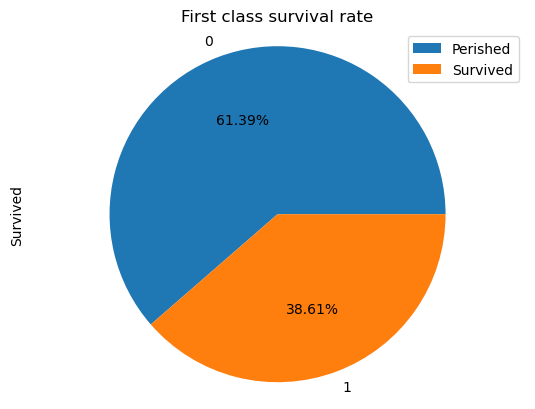

In [69]:
tit_df['Survived'].value_counts().plot(kind='pie',autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("First class survival rate")
plt.show

### 1.3 PClass

In [9]:
tit_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

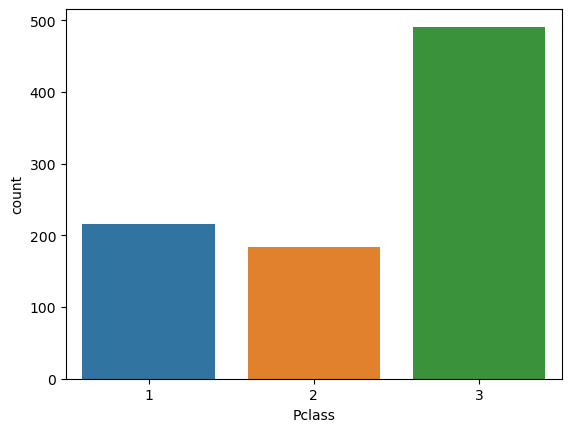

In [10]:
sns.countplot(x=tit_df['Pclass'])

### 1.4Name

### 1.5 Gender

In [11]:
tit_df['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

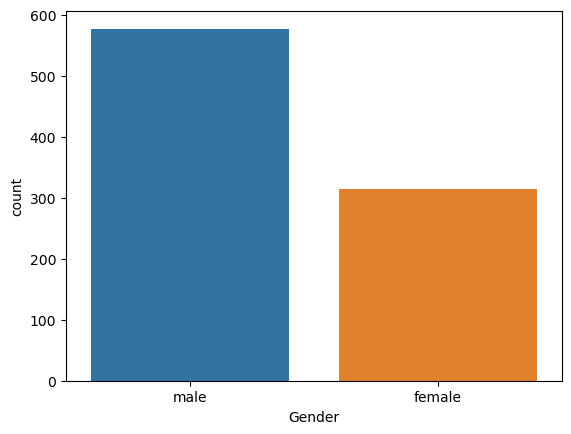

In [12]:
sns.countplot(x=tit_df['Gender'])

### 1.5 Age

In [13]:
tit_df['Age'].isna().sum()

177

#### handle missing value

In [14]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [15]:
tit_df['Age'] = tit_df[['Age','Pclass']].apply(impute_age,axis=1)

In [16]:
tit_df['Age'].isna().sum()

0

<Axes: ylabel='Age'>

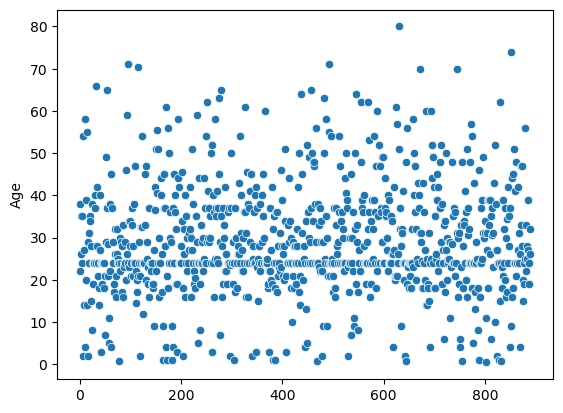

In [17]:
sns.scatterplot(tit_df['Age'])

<Axes: xlabel='Age'>

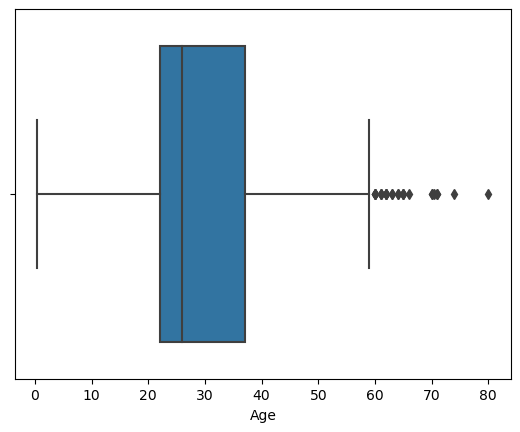

In [18]:
sns.boxplot(x=tit_df['Age'])

### 1.6 SibSP

In [19]:
tit_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

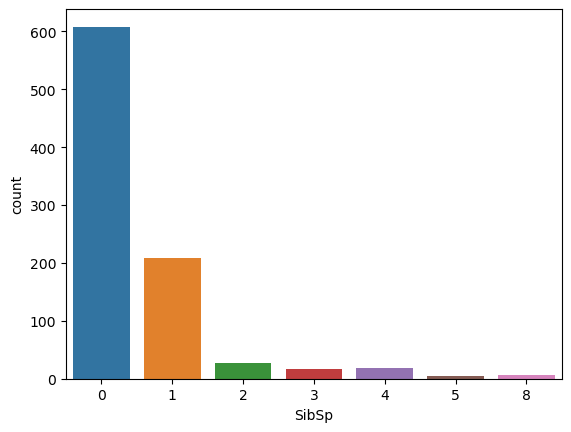

In [20]:
sns.countplot(x=tit_df['SibSp'])

### 1.7 Parch

In [21]:
tit_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

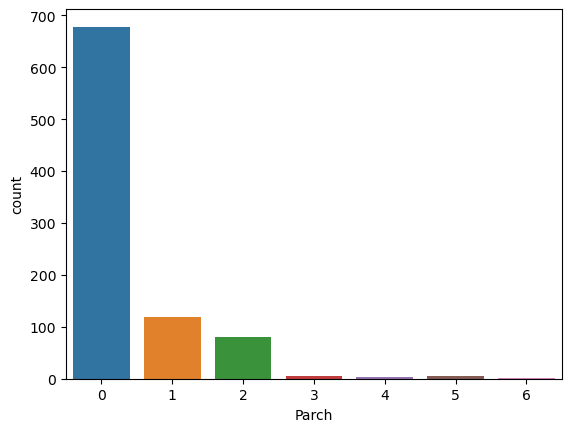

In [22]:
sns.countplot(x=tit_df['Parch'])

### 1.8 Ticket

### 1.9 Fare

In [23]:
tit_df['Fare'].isna().sum()

0

<Axes: ylabel='Fare'>

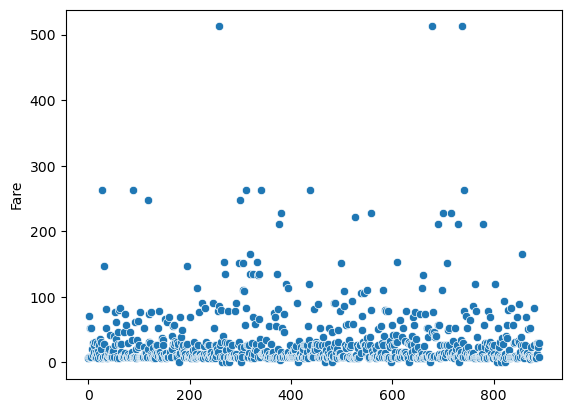

In [24]:
sns.scatterplot(tit_df['Fare'])

<Axes: xlabel='Fare'>

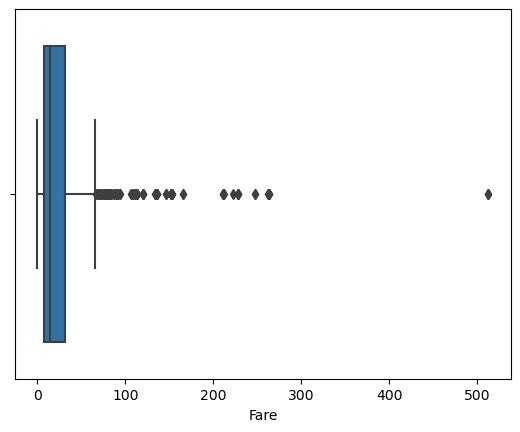

In [25]:
sns.boxplot(x=tit_df['Fare'])

#### Handle the Outlier

In [26]:
q1 = tit_df['Fare'].quantile(0.25)
q2 = tit_df['Fare'].quantile(0.5)
q3 = tit_df['Fare'].quantile(0.75)

IQR = q3-q1

lower_tail = q1 - 1.5*IQR
upper_tail = q3 + 1.5*IQR

In [27]:
tit_df['Fare'] = np.where(tit_df['Fare'] > upper_tail,upper_tail,tit_df['Fare'])

<Axes: xlabel='Fare'>

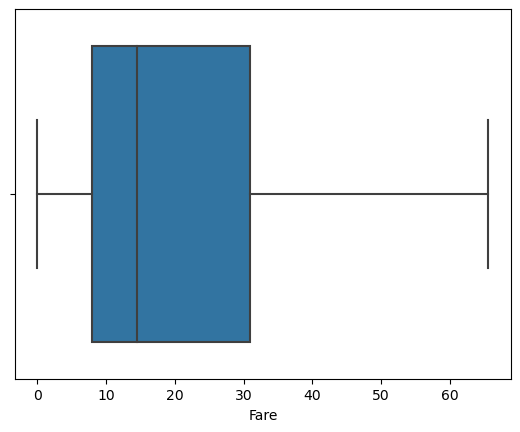

In [28]:
sns.boxplot(x=tit_df['Fare'])

### 2. Cabin

In [29]:
tit_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
tit_df['Cabin'].isna().sum()

687

### For Numerical Columns

### 2.1 Embarked

In [31]:
tit_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

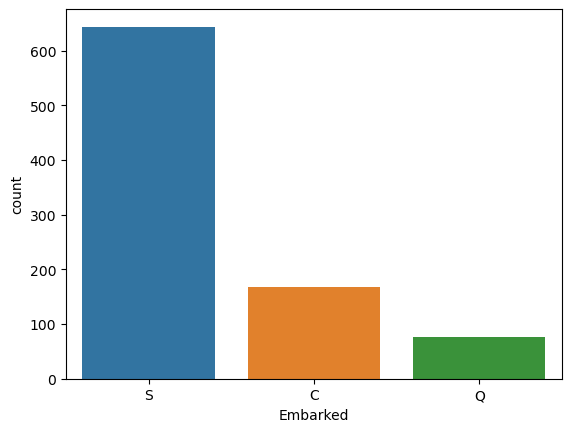

In [32]:
sns.countplot(x=tit_df['Embarked'])

There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.

## 2.Bivariate Analysis

### 2.1 Gender

###### Comparing the number of Survived people by gender to the total number of people¶

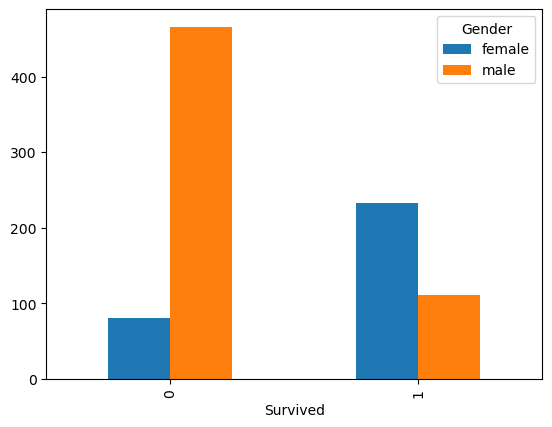

In [33]:
df_plot = tit_df.groupby(['Gender', 'Survived']).size().reset_index().pivot(columns='Gender', index='Survived', values=0)

df_plot.plot(kind='bar')
plt.show()


### 2.2 Fare

<Axes: xlabel='Survived', ylabel='Fare'>

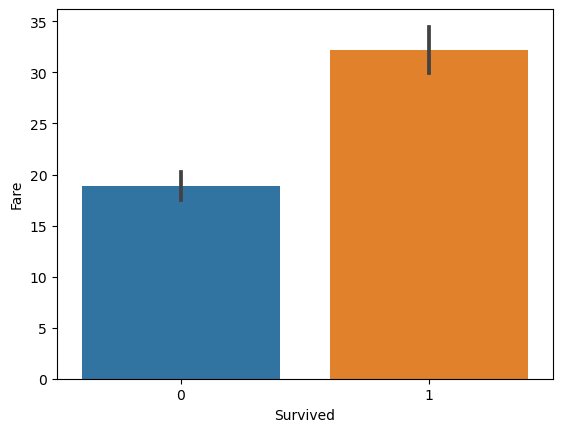

In [34]:
sns.barplot(x=tit_df['Survived'],y=tit_df['Fare'])

##### Observation -- The higher the fare, the chances of survival of the titanic ship

### 2.3 Pclass

##### analyze Pclass of Survived passengers using barplot



<Axes: xlabel='Pclass', ylabel='Survived'>

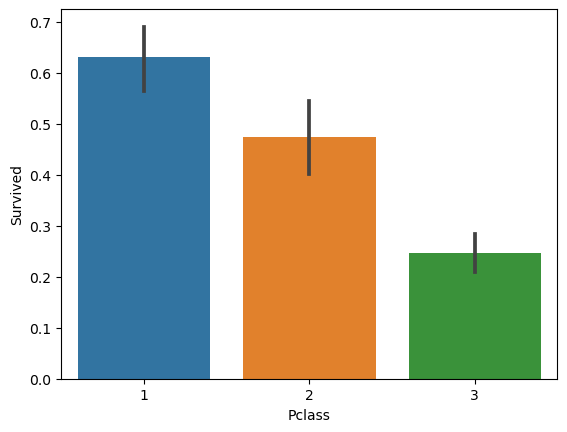

In [35]:
sns.barplot(x=tit_df['Pclass'],y=tit_df['Survived'])

In [40]:
tit_df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           370
        1           121
Name: Survived, dtype: int64

##### It’s clear from bar plot that mostly survived passengers belongs to class 1 and least number of passengers survived from class 3.

### 2.4 Embarked

<Axes: xlabel='Embarked', ylabel='Survived'>

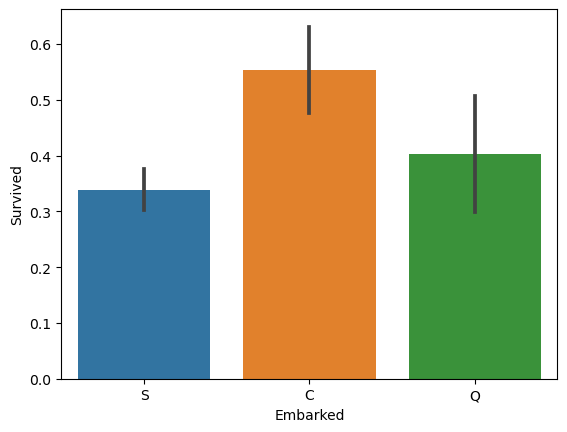

In [55]:
sns.barplot(x=tit_df['Embarked'],y=tit_df['Survived'])

##### Observation -- Those who embarked at Cherbourg (60%) have more chances at survival than others (Southampton - 35%, Queenstown - 40%)



## 3.Multivariate Analysis

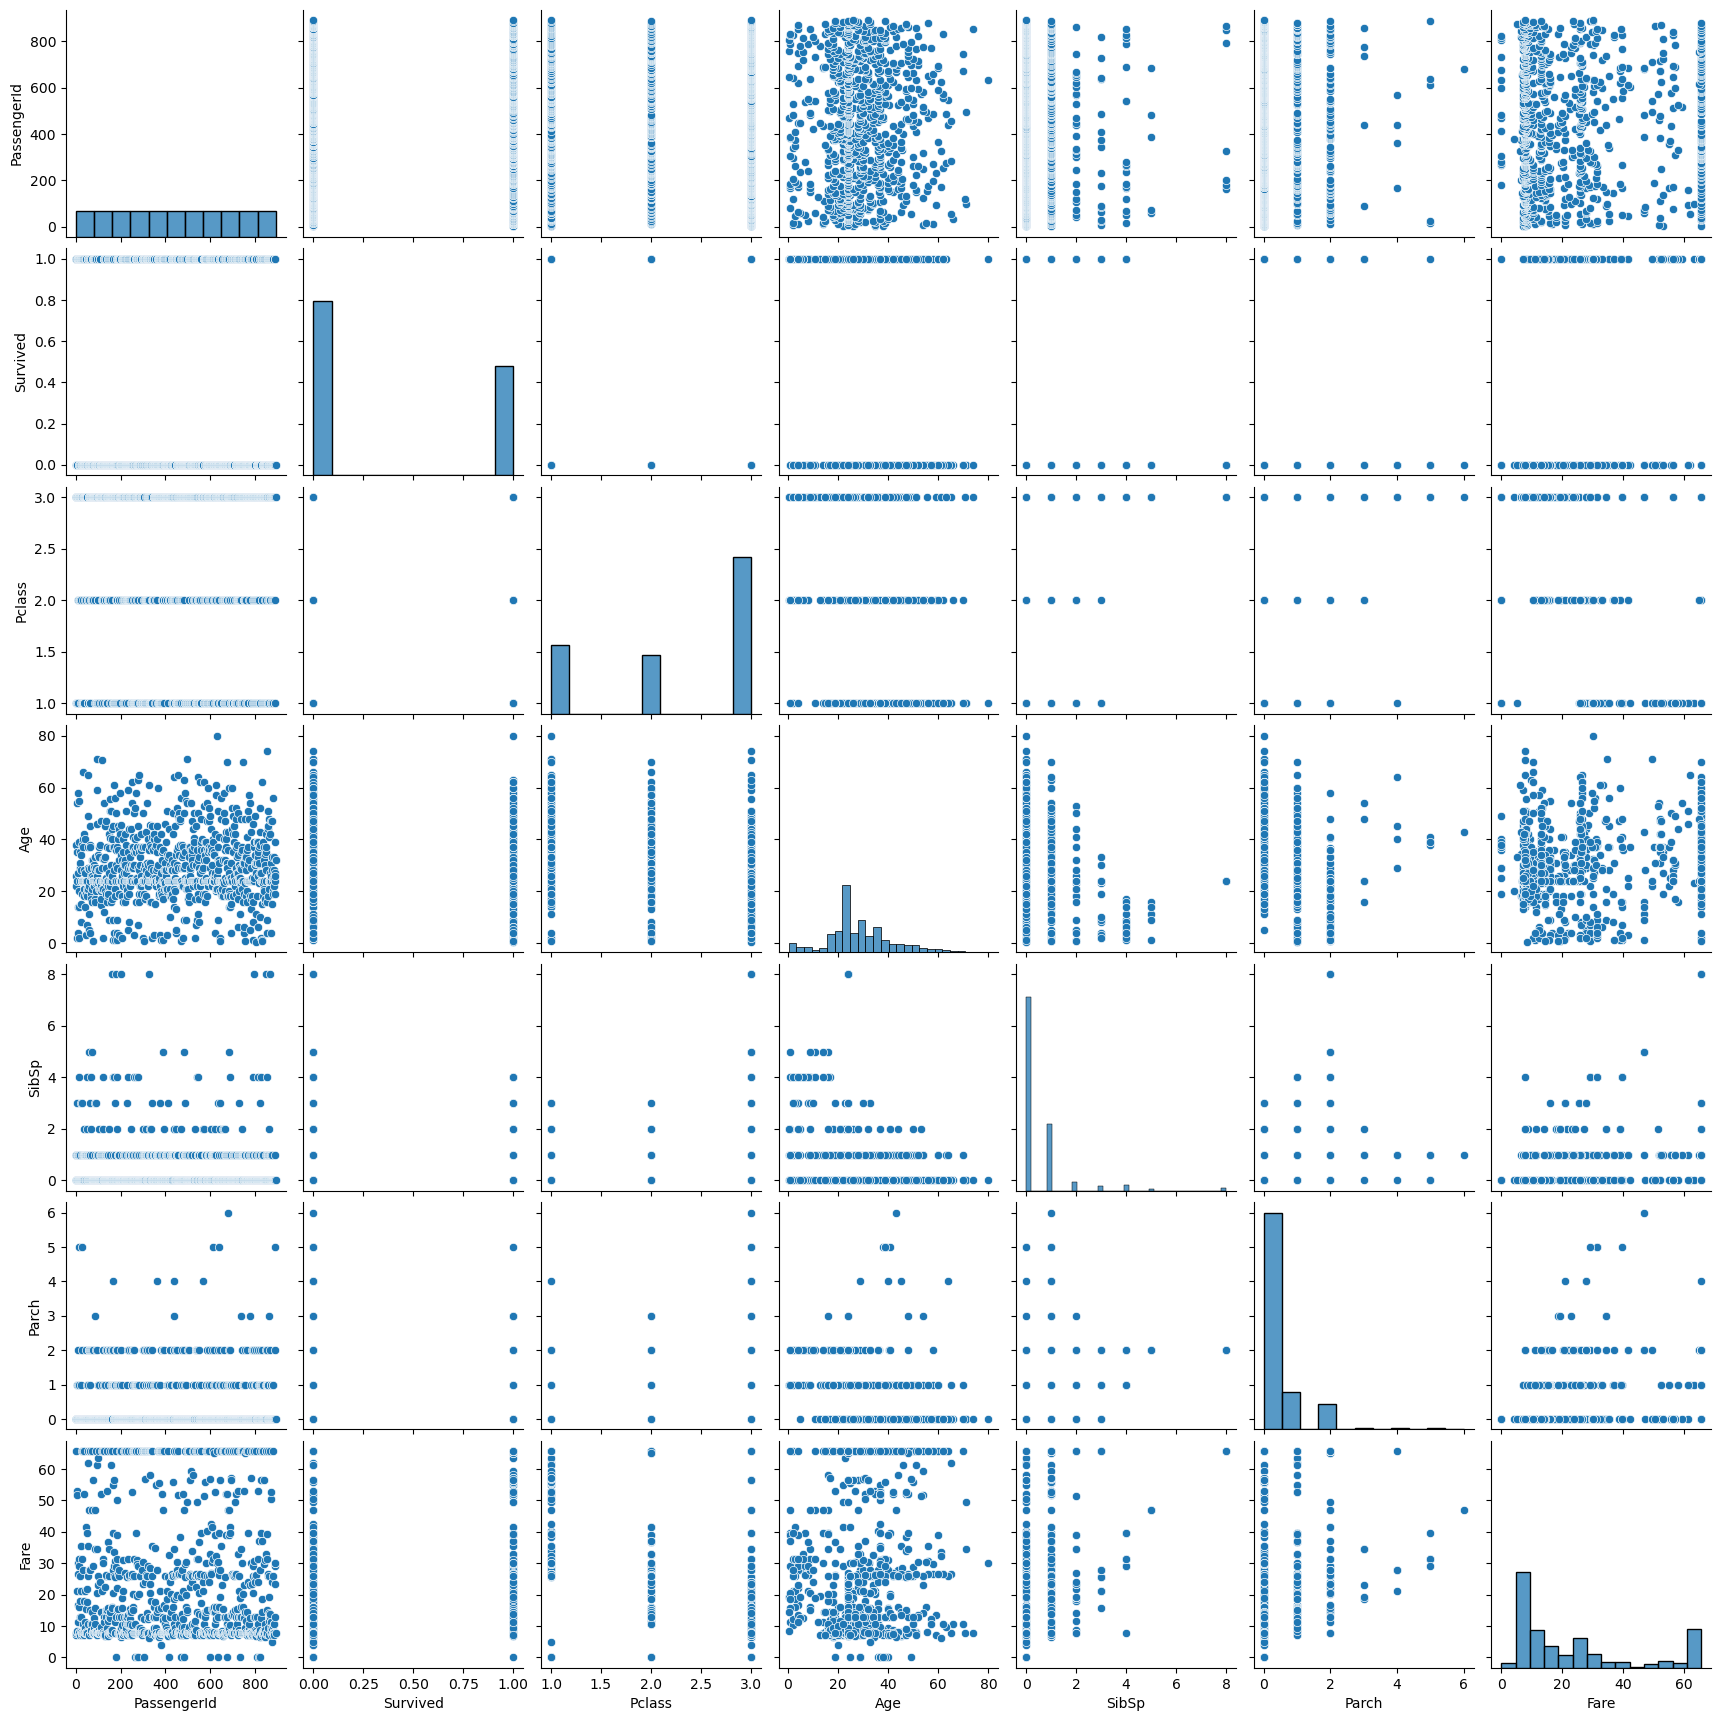

In [42]:
sns.pairplot(tit_df)

In [46]:
tit_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.012727,-0.035144,0.035840,-0.057527,-0.001652,0.003243
Survived,-0.012727,1.000000,-0.334297,-0.053496,-0.029105,0.082218,0.315855
Pclass,-0.035144,-0.334297,1.000000,-0.408487,0.083081,0.018443,-0.715300
Age,0.035840,-0.053496,-0.408487,1.000000,-0.243526,-0.171095,0.181956
SibSp,-0.057527,-0.029105,0.083081,-0.243526,1.000000,0.414838,0.332021
Parch,-0.001652,0.082218,0.018443,-0.171095,0.414838,1.000000,0.292616
Fare,0.003243,0.315855,-0.715300,0.181956,0.332021,0.292616,1.000000


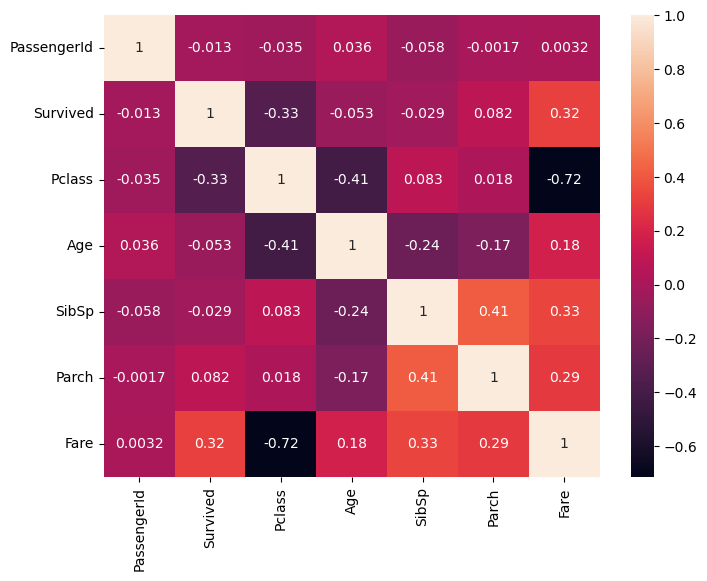

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(tit_df.corr(),annot=True)
plt.show()

##### Observation -- No single feature exhibits a stronger correlation with the target variable than the others based on the Above correalation heatmap.

In [73]:
pd.crosstab([tit_df.Gender, tit_df.Survived], [tit_df.Parch, tit_df.Pclass], margins=True)

Parch              0             1           2          3     4     5  6  All
Pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
Gender Survived                                                              
female 0           1    5   35   0   1  13   2   0  17  0  1  0  2  3  1   81
       1          63   40   50  17  17  12  11  11   8  2  1  0  0  1  0  233
male   0          63   81  259  10   7  21   3   3  15  0  1  1  1  1  0  466
       1          36    8   37   4   7   9   5   2   3  0  0  0  0  0  0  111
All              163  134  381  31  32  55  21  16  43  2  3  1  3  5  1  891

###### <b><p style='color:red'>The cross-tabulation suggests two main observations:

<b><p style='color:darkblue'>1. The majority of passengers traveled without parents, and among those who did have parents onboard, most had at most one parent accompanying them.
2. There appears to be a limited emphasis or special attention given to passengers with parents onboard during the rescue operation, as the numbers don't indicate a clear prioritization of this group.

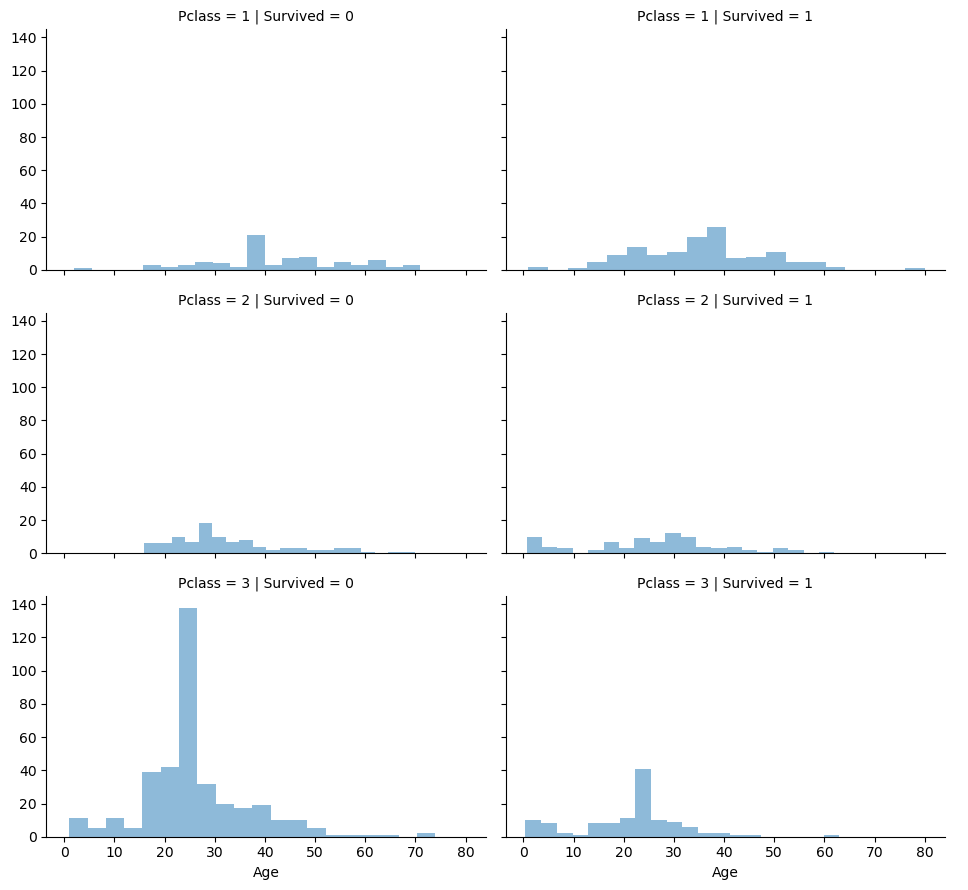

In [65]:
Grid_plot = sns.FacetGrid(tit_df, col='Survived', row='Pclass', aspect=1.6)
Grid_plot.map(plt.hist, 'Age', alpha=.5, bins=20)
Grid_plot.add_legend();

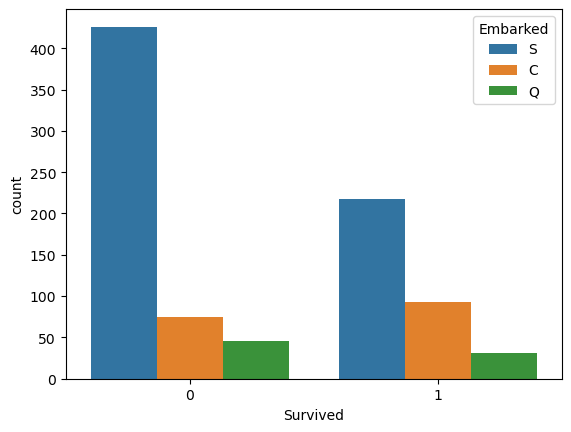

In [70]:
sns.countplot(x='Survived', data=tit_df,hue = 'Embarked');

<Axes: xlabel='Pclass', ylabel='Age'>

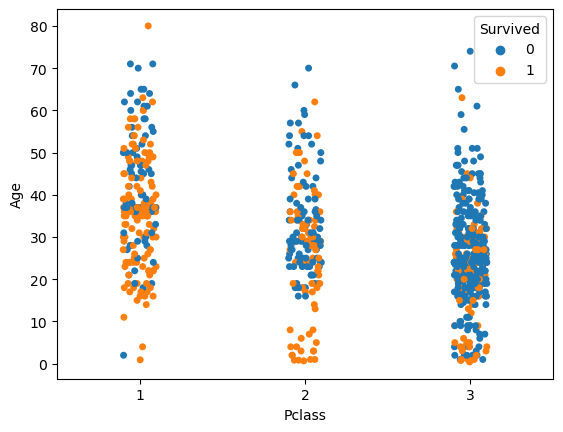

In [66]:
sns.stripplot(x="Pclass", y="Age", hue = 'Survived',data=tit_df)

## <b><p style='color:red'>EDA Summary 

<b><p style='color:darkblue'>In summary, the key factors influencing survival based on the report are:

1. Females exhibit a higher likelihood of survival.
2. Passengers who purchased first-class tickets have a greater chance of survival.

3. Individuals who paid a higher fare are more likely to survive.

4. Passengers who boarded the ship at the 'C' (Cherbourg) location have a higher probability of survival.

<h1 style="color:darkblue">Feature Encoding

In [74]:
tit_df['Gender'].replace({'male':1,'female':0},inplace=True)

In [75]:
tit_df = pd.get_dummies(tit_df,columns=['Embarked'])

In [76]:
tit_df.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,65.6344,C85,1,0,0


## Feature Selection

In [81]:
ken_corr = tit_df.corr(method='kendall')
ken_corr.head(1).T

,PassengerId
PassengerId,1.000000
Survived,-0.010397
Pclass,-0.026824
Gender,0.035079
Age,0.029099
SibSp,-0.048394
Parch,0.000798
Fare,-0.009568
Embarked_C,-0.000984
Embarked_Q,-0.027454


##### you can use all method also and select important feature for ex.VIF,Mutual Info,Chi-Square test,variance threshold method etc.

<h1 style="color:darkblue">Model Building

In [83]:
x = tit_df.drop(['PassengerId','Name','Ticket','Cabin','Survived'],axis=1)
y = tit_df['Survived']

## Train Test Split

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2,stratify=y)

In [91]:
x_train.shape

(712, 9)

In [92]:
x_test.shape

(179, 9)

In [93]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

### Training Data Evaluation

In [95]:
def evaluation(model,ind_var,act):
    pred = model.predict(ind_var)
    
    accuracy = accuracy_score(act,pred)
    print('Accuracy is :',accuracy)
    
    con_mat = confusion_matrix(act,pred)
    print('Confusion matrix: \n',con_mat)
    
    cls_rep = classification_report(act,pred)
    print('Classification Report: \n',cls_rep)
    
    

print('Training Data Evaluation'.center(60,'*'))

evaluation(log_reg,x_train,y_train)

******************Training Data Evaluation******************
Accuracy is : 0.7921348314606742
Confusion matrix: 
 [[379  58]
 [ 90 185]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       437
           1       0.76      0.67      0.71       275

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.78       712
weighted avg       0.79      0.79      0.79       712



### Testing Data Evaluation

In [96]:
def evaluation(model,ind_var,act):
    pred = model.predict(ind_var)
    
    accuracy = accuracy_score(act,pred)
    print('Accuracy is :',accuracy)
    
    con_mat = confusion_matrix(act,pred)
    print('Confusion matrix: \n',con_mat)
    
    cls_rep = classification_report(act,pred)
    print('Classification Report: \n',cls_rep)
    
    

print('Training Data Evaluation'.center(60,'*'))

evaluation(log_reg,x_test,y_test)

******************Training Data Evaluation******************
Accuracy is : 0.8324022346368715
Confusion matrix: 
 [[97 13]
 [17 52]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [104]:
x_train[2:3]

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
249,2,1,54.0,1,0,26.0,0,0,1


In [102]:
log_reg.predict(x_train[1:2])

array([0], dtype=int64)

In [107]:
x_train[:1]

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
339,1,1,45.0,0,0,35.5,0,0,1


In [110]:
x_train[:1].T

,339
Pclass,1.0
Gender,1.0
Age,45.0
SibSp,0.0
Parch,0.0
Fare,35.5
Embarked_C,0.0
Embarked_Q,0.0
Embarked_S,1.0


In [115]:
log_reg.predict(x_train[:1])[0]

0

In [111]:
Pclass = 1
Gender = 'male'
Age = 45
SibSp = 0
Parch = 0
Fare = 35.5
Embarked = 'S'

# Survived = ?

In [112]:
test_array = np.array([1,1,45,0,0,35.5,0.,0.,1.],ndmin=2)
test_array

array([[ 1. ,  1. , 45. ,  0. ,  0. , 35.5,  0. ,  0. ,  1. ]])

In [113]:
log_reg.predict(test_array)[0]

0

##### Above Passenger is Survived

## Applied Other Model Also

### 2.Decision Tree

In [118]:
dt_cls = DecisionTreeClassifier()
dt_cls.fit(x_train,y_train)

DecisionTreeClassifier()

In [121]:
print('Training Data Evaluation'.center(60,'*'))
evaluation(dt_cls,x_train,y_train)

******************Training Data Evaluation******************
Accuracy is : 0.9803370786516854
Confusion matrix: 
 [[435   2]
 [ 12 263]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       437
           1       0.99      0.96      0.97       275

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



##### False Positive Rate is very Small

In [123]:
print('Testing Data Evaluation'.center(60,'*'))
evaluation(dt_cls,x_test,y_test)

******************Testing Data Evaluation*******************
Accuracy is : 0.7932960893854749
Confusion matrix: 
 [[90 20]
 [17 52]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



## Hyperparameter Tunning

In [135]:
hyp = {'criterion':['entropy', 'gini'],
      'splitter':['best','random'],
      'max_depth': np.arange(5,12),
      'min_samples_split': np.arange(6,12),
      'min_samples_leaf': np.arange(6,12)}

gscv_dt_model = GridSearchCV(dt_cls, hyp, cv=3)
gscv_dt_model.fit(x_train, y_train)
gscv_dt_model.best_estimator_
gscv_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'splitter': 'random'}

In [138]:
dt_cls_hyp = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=8,min_samples_split=8,splitter='random')
dt_cls_hyp.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       splitter='random')

In [157]:
print('Training Data Evaluation'.center(60,'*'))
acc_dt = round(dt_cls_hyp.score(x_train, y_train) * 100, 2)
print('train_accuracy : ',acc_dt)
print()
print('Testing Data Evaluation'.center(60,'*'))
acc_dt = round(dt_cls_hyp.score(x_test, y_test) * 100, 2)
print('test_accuracy : ',acc_dt)

******************Training Data Evaluation******************
train_accuracy :  83.43

******************Testing Data Evaluation*******************
test_accuracy :  83.8


### 3.Random Forest

In [124]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [156]:
print('Training Data Evaluation'.center(60,'*'))
acc_rf = round(rf.score(x_train, y_train) * 100, 2)
print('train_accuracy : ',acc_rf)
print()
print('Testing Data Evaluation'.center(60,'*'))
acc_rf = round(rf.score(x_test, y_test) * 100, 2)
print('test_accuracy : ',acc_rf)

******************Training Data Evaluation******************
train_accuracy :  98.03

******************Testing Data Evaluation*******************
test_accuracy :  82.68


### 4.KNN 

In [131]:
knn_cls = KNeighborsClassifier()
knn_cls.fit(x_train,y_train)

KNeighborsClassifier()

In [155]:
print('Training Data Evaluation'.center(60,'*'))
acc_knn = round(knn_cls.score(x_train, y_train) * 100, 2)
print('train_accuracy : ',acc_knn)
print()
print('Testing Data Evaluation'.center(60,'*'))
acc_knn = round(knn_cls.score(x_test, y_test) * 100, 2)
print('test_accuracy : ',acc_knn)

******************Training Data Evaluation******************
train_accuracy :  78.93

******************Testing Data Evaluation*******************
test_accuracy :  73.18


### 5.SVM

In [127]:
svm_cls = SVC()
svm_cls.fit(x_train,y_train)

SVC()

In [154]:
print('Training Data Evaluation'.center(60,'*'))
acc_svm = round(svm_cls.score(x_train, y_train) * 100, 2)
print('train_accuracy : ',acc_svm)
print()
print('Testing Data Evaluation'.center(60,'*'))
acc_svm = round(svm_cls.score(x_test, y_test) * 100, 2)
print('test_accuracy : ',acc_svm)

******************Training Data Evaluation******************
train_accuracy :  69.8

******************Testing Data Evaluation*******************
test_accuracy :  72.63


### 6.Naive_Bayes

In [159]:
ber_nb = BernoulliNB()
ber_nb.fit(x_train,y_train)

BernoulliNB()

In [160]:
print('Training Data Evaluation'.center(60,'*'))
acc_nb = round(ber_nb.score(x_train, y_train) * 100, 2)
print('train_accuracy : ',acc_nb)
print()
print('Testing Data Evaluation'.center(60,'*'))
acc_nb = round(ber_nb.score(x_test, y_test) * 100, 2)
print('test_accuracy : ',acc_nb)

******************Training Data Evaluation******************
train_accuracy :  76.4

******************Testing Data Evaluation*******************
test_accuracy :  83.8


## 7.AdaBoost

In [164]:
ada_cls = AdaBoostClassifier()
ada_cls.fit(x_train,y_train)

AdaBoostClassifier()

In [165]:
print('Training Data Evaluation'.center(60,'*'))
acc_ada = round(ada_cls.score(x_train, y_train) * 100, 2)
print('train_accuracy : ',acc_ada)
print()
print('Testing Data Evaluation'.center(60,'*'))
acc_ada = round(ada_cls.score(x_test, y_test) * 100, 2)
print('test_accuracy : ',acc_ada)

******************Training Data Evaluation******************
train_accuracy :  82.3

******************Testing Data Evaluation*******************
test_accuracy :  84.92


## <h1 style="color:red">Model Summary

<b><p style='color:darkblue'>In Conclusion, Firstly the main goal is to predict the Survived Passenger or not by using different model as we can see in above model building result. We had the comparison between evaluation of 6 distinct models.</p></b> 
    
    

<b><p style='color:darkblue'>Evaluation of four distinct models has provided us with valuable insights into their performance and suitability for our project. First the base model Logistics Regression algorithm is used and check the overall performance of the model and apply other model also like.Decision Tree, Random Forest, Ada-Boost Regressor,SVM,NaiveBayes,KNN_algo.

<b><p style='color:darkblue'>While each model demonstrated strengths in certain aspects, Decision Tree hyperparameter and Adaboost Classifier consistently delivered the highest performance across our chosen evaluation metrics, underscoring its aptness for our specific use case. These findings guide us toward the confident selection Decision Tree hyperparameter of as the preferred candidate(s) to advance our project. Moving forward, we are committed to leveraging these insights to enhance our model's capabilities further and to explore its deployment for practical applications. This phase of model evaluation has been instrumental in shaping our project's trajectory, and we extend our appreciation to all contributors and collaborators who have supported us throughout this journey.</p></b> 
